# Solución de la ecuación de calor en 1-D


In [1]:
'''
                2         
∂              ∂          
──(u(t, x)) = ───(u(t, x))  +  f(x)
∂t              2         
              ∂x   

En una varilla x ∈ [0.0, 1.0].

Fuente de calor f(x).

Condiciones de borde:
u(0,t) = 0
u(1,t) = = 0

u(x,0) = u_o = sin(pi*x)

Fuente: f(x) = r = 1

'''

'\n                2         \n∂              ∂          \n──(u(t, x)) = ───(u(t, x))  +  f(x)\n∂t              2         \n              ∂x   \n\nEn una varilla x ∈ [0.0, 1.0].\n\nFuente de calor f(x).\n\nCondiciones de borde:\nu(0,t) = 0\nu(1,t) = = 0\n\nu(x,0) = u_o = sin(pi*x)\n\nFuente: f(x) = r = 1\n\n'

In [2]:
from dolfin import *
from mshr import *

In [3]:
from fenics import *
import matplotlib.pyplot as plt

In [4]:
n_puntos_malla = 32 
mesh = UnitIntervalMesh(n_puntos_malla)

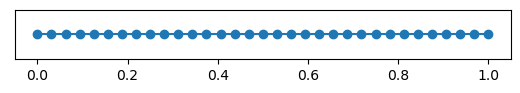

In [5]:
plot(mesh)

In [6]:
# Definir el espacio funcional de prueba (H)
fspace = FunctionSpace(mesh, "Lagrange",  1)

En el libro:

dt(u) = k*lap(u) + r

En la ecuación multi-dimensional tenemos (k=1) :

dt(u) = lap(u) + r

Consideramos la varilla de longitud L=1, es decir [0,1], k=1, r=1, con condiciones iniciales, u=u_D, en los extremos del cable:

- u(0,t) = 0
- u(1,t) = 0

Fuente en el tiempo t=0:

u(x,0) = u_o = f(x) = sin(πx)

Para todo x en (0,1)

In [7]:
# Condición de frontera (u=0 en los extremos)
def funcion_bool(x, on_boundary):
    return on_boundary

# escribimos la condición del problema
condicion_borde = DirichletBC(fspace, Constant(0.0), funcion_bool)

Text(0.5, 1.0, 'u(x,0)')

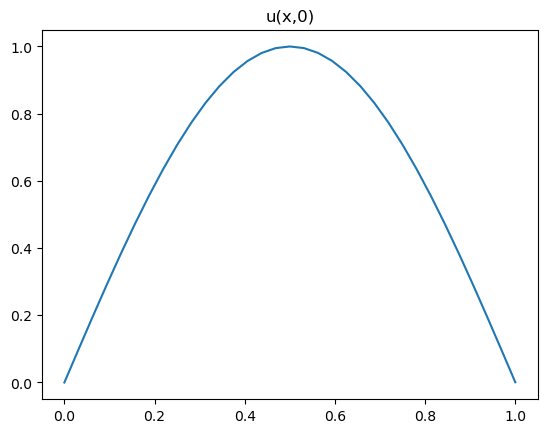

In [8]:
# En problemas evolutivos, a parte de la condición de borde, tenemos una condición inicial
u_o = Expression("sin(3.141*x[0])", degree = 1)

# discretizo la condición inicial
u_n = interpolate(u_o, fspace)

plt.figure()
plot(u_n)
plt.title("u(x,0)")

In [9]:
delta_t = 0.01

In [10]:
# Decirle a Fenics la forma variacional: a(u,v) - lv(f) = 0
# Cuando vamos a repetir iterativamente el cálculo, podemos definir una forma variacional que se repita:

# Define la función u (función u^{n+1}), v (función test)
u = TrialFunction(fspace)
v = TestFunction(fspace)

r = Constant(1.0)

forma_variacional = u * v * dx  +  delta_t * dot(grad(u), grad(v)) * dx   - ( u_n * v * dx   +  delta_t * r * v * dx )  

# puedo hallar los lados izquierdos y derechos del problema de arriba automáticamente en cualquier iteración
lhs_ecuacion = lhs(forma_variacional) 
rhs_ecuacion = rhs(forma_variacional) 

# definimos la función que guardará nuestra solución
u_sol = Function(fspace)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
En el tiempo t=0.2
u_sol(0.5,t)=0.2574
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variationa

Text(0.5, 1.0, 'solución para diferentes tiempos')

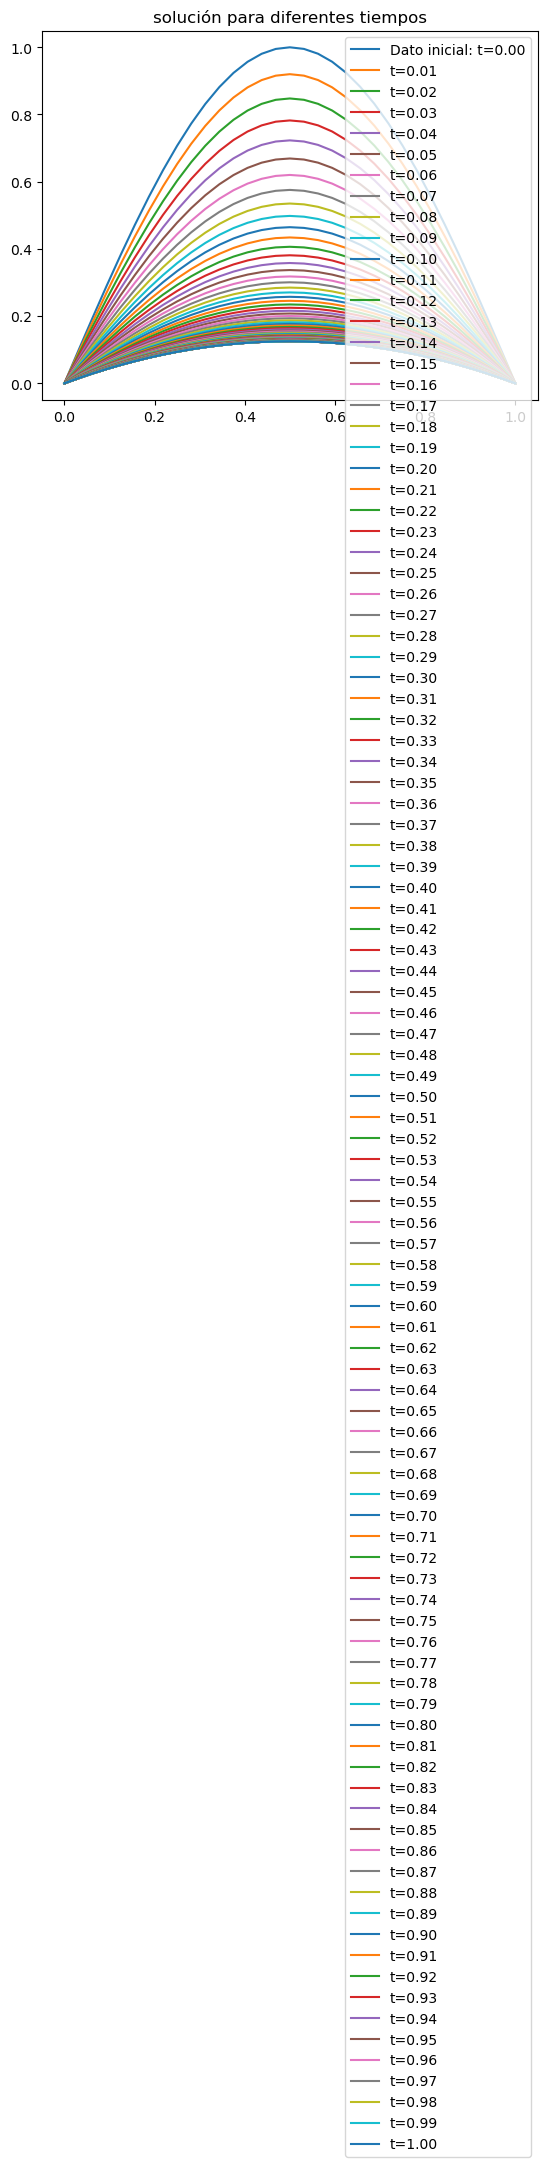

In [11]:
# Ahora resolveré la forma variacional de arriba para cada iteración de tiempo
n_pasos_tiempo = 100
tiempo = 0

plot(u_n, label = "Dato inicial: " f"t={tiempo:1.2f}") # = u_o 
for i in range(n_pasos_tiempo):
    tiempo += delta_t

    solve(lhs_ecuacion == rhs_ecuacion, u_sol, condicion_borde)
    u_n.assign(u_sol)

    plot(u_sol, label = f"t={tiempo:1.2f}")

    if(tiempo%0.1 < 0.0001):
        print("En el tiempo t=" + str(round(tiempo,2)))
        print("u_sol(0.5,t)=" + str( round(u_sol(0.5),4) ) )

plt.legend()
plt.title("solución para diferentes tiempos")

In [12]:
u_o(0.5)

0.9999999560952156

In [13]:
u_sol(0.5)

0.1250706597077854

In [14]:
u_sol(0.2)

0.07992429677582359